In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers
from keras.models import Sequential , load_model
from keras.layers import Dense, Conv2D,Dropout ,MaxPooling2D , Flatten
from keras.preprocessing.image import load_img, ImageDataGenerator
from keras import callbacks
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test ,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
print('X_train shape :',X_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

X_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
X_test shape : (10000, 32, 32, 3)
y_test shape : (10000, 1)


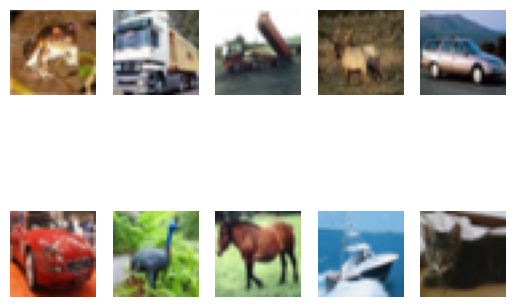

In [4]:
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(X_train[i])
  plt.axis('off')

In [5]:
labels ='airplane automobile bird cat deer dog frog horse ship truck'.split()
len(labels)

10

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [7]:
data_generator =ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range= 0.1,
    horizontal_flip= True
)

In [8]:
train_generator = data_generator.flow(X_train,y_train,batch_size =32)

In [12]:
from keras.src.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.src.engine.sequential import input_layer
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation ='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
training = model.fit(train_generator, validation_data=(X_test,y_test),epochs =20)

Epoch 1/20
1563/1563 [==============================] - 40s 24ms/step - loss: 1.6359 - accuracy: 0.4090 - val_loss: 1.4078 - val_accuracy: 0.4792
Epoch 2/20
1563/1563 [==============================] - 35s 23ms/step - loss: 1.3391 - accuracy: 0.5218 - val_loss: 1.4018 - val_accuracy: 0.5244
Epoch 3/20
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2154 - accuracy: 0.5695 - val_loss: 1.4124 - val_accuracy: 0.5242
Epoch 4/20
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1432 - accuracy: 0.5962 - val_loss: 1.1644 - val_accuracy: 0.6037
Epoch 5/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0789 - accuracy: 0.6202 - val_loss: 0.9246 - val_accuracy: 0.6757
Epoch 6/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0394 - accuracy: 0.6343 - val_loss: 0.9074 - val_accuracy: 0.6844
Epoch 7/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0074 - accuracy: 0.6481 - val_loss: 1.3717 -

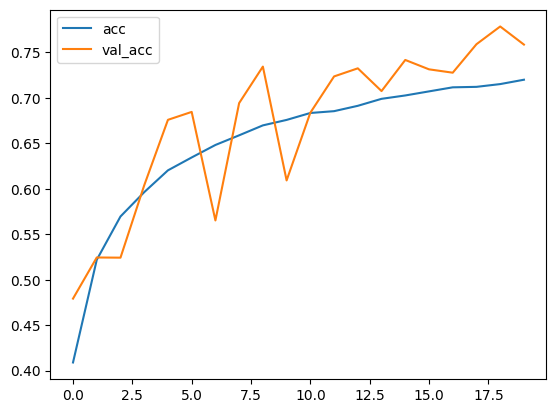

In [16]:
plt.plot(training.history['accuracy'],label='acc')
plt.plot(training.history['val_accuracy'],label='val_acc')
plt.legend()

1/1 [==============================] - 0s 17ms/step
Original label is : ship
Predicted label is : ship


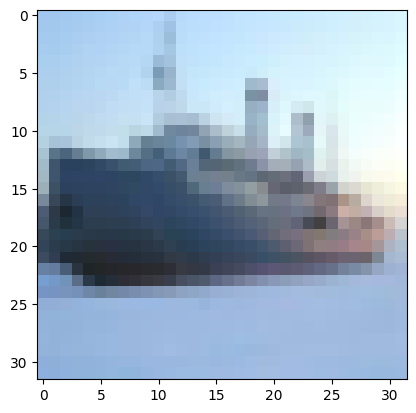

In [37]:
image_number = np.random.choice(500)

# display the image
plt.imshow(X_test[image_number])

# load the image in an array
n = np.array(X_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

print("Original label is :",original_label)
print("Predicted label is :",predicted_label)